In [28]:
import numpy as np

文章生成の実装: モデルに文章生成機能を追加

In [29]:
import sys
sys.path.append(r'C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-2-master')
from ch06.rnnlm import Rnnlm
from common.functions import softmax

class RnnlmGen(Rnnlm): # 既存のクラス(Rnnlm)を引き継いで新しいクラス生成

    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id] # 最初の単語IDが入ったリスト生成（ここに生成した単語を追加していく）

        x = start_id # 最初の単語IDもxに格納
        while len(word_ids) < sample_size: # 最初の単語+生成した単語数が一定数を超えるまで
            x = np.array(x).reshape(1, 1) # 単語IDを(1,1)の配列に変換（モデルがミニバッチ処理するため）
            score = self.predict(x) # 入力単語に対する次の単語のスコア週を取得
            p = softmax(score.flatten()) # 確率分布に変換

            sampled = np.random.choice(len(p), size=1, p=p) # 確率分布に則って単語ID（インデックス）をランダム選択
            if (skip_ids is None) or (sampled not in skip_ids): # <unk>やNの単語IDを含むリストにそのサンプルがないなら
                x = sampled # そのサンプル（インデックス）を次の入力単語に設定
                word_ids.append(int(x)) # その単語IDを単語生成のリストに追加

        return word_ids

    def get_state(self):
        return self.lstm_layer.h, self.lstm_layer.c

    def set_state(self, state):
        self.lstm_layer.set_state(*state)

文章生成(言語モデルRnnlm)

In [30]:
import sys
sys.path.append(r'C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-2-master')
from ch07.rnnlm_gen import RnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params(r'C:\Users\jiwon\OneDrive\Desktop\DL2\MyParams\Rnnlm.pkl')

# start文字とskip文字の設定
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 文章生成
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids]) # リストの単語を間隔を開けて連結
txt = txt.replace(' <eos>', '.\n') # <eos>を改行に変換
print(txt)

you did n't know what.
 trucking companies can exercise anything partially built.
 one of the big board was fueled out of eliminating mr. cruz.
 bankers trust said it will take a news conference against most hardware for each other car firm and that said that with those cosmetics companies and further development have lived again.
 but which people would lose the companies ' financial volatility has machine many trade and numbers would include the end of a industrial category in their own account as for another quarter ahead.
 vickers also had improvements a final increase


文章生成(言語モデルBetterRnnlm)

In [31]:
# coding: utf-8
import sys
sys.path.append(r'C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-2-master')
# from common.np import *
from ch07.rnnlm_gen import BetterRnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params(r'C:\Users\jiwon\OneDrive\Desktop\DL2\MyParams\BetterRnnlm.pkl')

# start文字とskip文字の設定
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 文章生成
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)


model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

# is以外をモデルに読み込ませその単語列の情報を保持させる（出力は特に使わない）
for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

# isを先頭文字として文章生成
word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)


you must office checks and controls to buy ticket packaging if they do n't soon instead they would be one or more investment supply.
 in addition mr. 's backers result in specific cases of the special-interest code may have been sitting for less than its direct month of tactical academic regulations.
 both the two groups favored by president bush has prepared to enter the california earthquake.
 although criticism of the disaster that has the commerce department 's defense segment or the more adjustment inquiries are concerned about california 's degree as a vehicle.
 still we can
--------------------------------------------------
the meaning of life is saying its success also has been served at least much sotheby 's said.
 because of the right competition that wo n't cover the authority places an equal number of the railroad for it is tighten on as a full.
 both securities laws had been left by law firms.
 the company in a study also called new profit for example interests in a govern

足し算のデータセット

In [32]:
# coding: utf-8
import sys
sys.path.append(r'C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-2-master')
from dataset import sequence


(x_train, t_train), (x_test, t_test) = \
    sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)
# (45000, 7) (45000, 5) ７文字、５文字　
# (5000, 7) (5000, 5)

print(x_train[0])
print(t_train[0])
# [ 3  0  2  0  0 11  5]
# [ 6  0 11  7  5]

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))
# 71+118
# _189


(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
71+118 
_189 


Encorder：入力文字をベクトルに変換して機械が読めるようにする
　詳細：入力データ最終時刻における隠れ状態を出力（それまでの文字列における情報を保持）

In [33]:
import sys
sys.path.append(r'C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-2-master')
from common.time_layers import *

class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 重みの初期化
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')

        # レイヤ生成
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)

        # パラメータと勾配をまとめる
        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        # 逆伝播計算用
        self.hs = None

    def forward(self, xs):
        xs = self.embed.forward(xs) # 文字IDを分散表現（ベクトル）に変換
        hs = self.lstm.forward(xs) # 隠れ状態を出力（セルと上方向の隠れ状態は破棄）
        self.hs = hs
        return hs[:, -1, :] # 最後の自国における隠れ状態だけ返す

    def backward(self, dh): # Decorderから勾配を受け取る
        dhs = np.zeros_like(self.hs) # 順伝播時の出力hsの数だけ勾配を初期化
        dhs[:, -1, :] = dh # Decorderからもらった勾配を最後の時刻における隠れ状態の勾配に設定

        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

Decorder：ベクトルを人間が読めるような情報に変換
　詳細：受け取った隠れ状態を基に、その次に来る最も確率の高い文字ベクトルを文字IDにして返す

In [34]:
import sys
sys.path.append(r'C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-2-master')
from common.time_layers import *

class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 重みの初期化
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # レイヤ生成
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        # パラメータと勾配をまとめる
        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, h):
        self.lstm.set_state(h) # Encoderの出力h（最終時刻の隠れ状態）

        out = self.embed.forward(xs) # 入力（まず区切り文字"_"）の分散表現を取得
        out = self.lstm.forward(out) # Encoderの出力hを基に次への隠れ状態を出力
        score = self.affine.forward(out) # 隠れ状態を元にそれぞれの文字ベクトルのスコア計算
        return score

    def backward(self, dscore): # SoftmaxWithLossから勾配を受け取る
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh # メンバ変数から最初の時刻における勾配を取得
        return dh # Encoderに渡す

    # 学習はforward後、Time SoftmaxWithLossに通す
    # 生成はScoreの最大値のインデックスを求める
    def generate(self, h, start_id, sample_size):
        sampled = [] # 生成した文字を格納するリスト
        sample_id = start_id # 先頭の文字IDを入力
        self.lstm.set_state(h) # Encorderの出力h（最終時刻の隠れ状態）

        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1, 1)) # 単語IDを(1,1)の配列に変換（モデルがミニバッチ処理するため）
            # スコア求めるまで前伝播と同じ
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out)

            # スコア最大値のインデックス(文字ID)を求めてリストに格納し次の入力にする
            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))

        return sampled

Seq2Seq(２つの時系列EncorderとDecorderをまとめたもの)を実装

In [35]:
import sys
sys.path.append(r'C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-2-master')
from common.base_model import BaseModel

class Seq2seq(BaseModel): # BaseModelクラスからsave_params(), load_params()を利用、またGPU対応やビット削減も担う
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        # 各シークエンスのレイヤにおける重み初期化
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        # 各シークエンスから得たパラメータと勾配リストを一つにまとめる
        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

    # 学習
    def forward(self, xs, ts): # xsはencoderだけで使う
        # 学習だから時系列方向にデータをまとめて与える
        # decoderの入力は最後の文字以外を問題として入力（前から１文字ずつ）
        # 正解ラベルは最初の文字（"_"）以外を抽出（最初の文字は入力になるから）
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]

        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss

    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout

    # 生成
    def generate(self, xs, start_id, sample_size): # エンコードに使う入力xs, start_id(ここでは"_"の文字ID,生成する文字数)
        h = self.encoder.forward(xs) # 隠れ状態を取得
        # その隠れ状態を基に、"_"を先頭にして次に来る文字を出力し返す
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 0[s] | loss 2.53
| epoch 1 |  iter 41 / 351 | time 0[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 1[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 1[s] | loss 1.92
| epoch 1 |  iter 101 / 351 | time 2[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 2[s] | loss 1.85
| epoch 1 |  iter 141 / 351 | time 2[s] | loss 1.83
| epoch 1 |  iter 161 / 351 | time 3[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 3[s] | loss 1.77
| epoch 1 |  iter 201 / 351 | time 4[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 4[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 4[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 5[s] | loss 1.76
| epoch 1 |  iter 281 / 351 | time 5[s] | loss 1.75
| epoch 1 |  iter 301 / 351 | time 6[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 6[s] | loss 1.75
| epoch 1 |  iter 341 / 351 | time 7[s] | loss 1.74
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 66

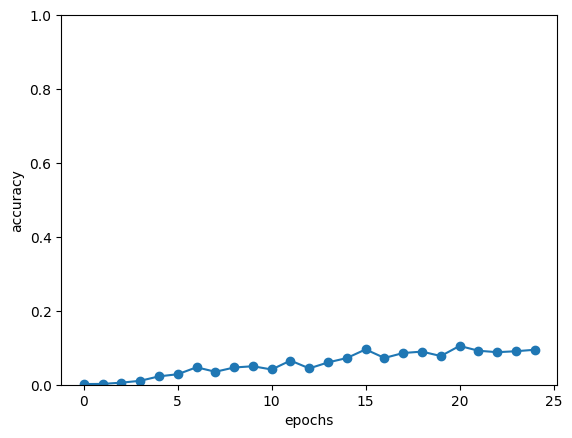

In [36]:
# coding: utf-8
import sys
sys.path.append(r'C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-2-master')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# データセットの読み込み
(x_train, t_train) , (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# Reverse input? =================================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# Normal or Peeky? ==============================================
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
# 1エポック毎に10このテストデータを使って正解率を出力
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()



seq2seqの改良１（入力データの反転）

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 0[s] | loss 2.52
| epoch 1 |  iter 41 / 351 | time 0[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 1[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 1[s] | loss 1.91
| epoch 1 |  iter 101 / 351 | time 2[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 2[s] | loss 1.86
| epoch 1 |  iter 141 / 351 | time 2[s] | loss 1.84
| epoch 1 |  iter 161 / 351 | time 3[s] | loss 1.80
| epoch 1 |  iter 181 / 351 | time 3[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 4[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 4[s] | loss 1.77
| epoch 1 |  iter 241 / 351 | time 4[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 5[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 5[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 6[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 6[s] | loss 1.74
| epoch 1 |  iter 341 / 351 | time 7[s] | loss 1.73
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 66

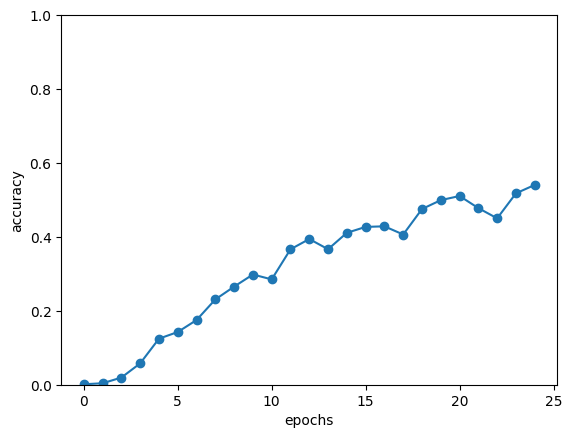

In [37]:
# coding: utf-8
import sys
sys.path.append(r'C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-2-master')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# データセットの読み込み
(x_train, t_train) , (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# Reverse input? =================================================
is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# Normal or Peeky? ==============================================
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
# 1エポック毎に10このテストデータを使って正解率を出力
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()



seq2seqの改良２（Encoderの情報をDecoder全体に渡す：Encoderの出力hをDecoderのLSTMとAffineにXと結合して入力する）

In [38]:
import sys
sys.path.append(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-2-master")
from common.time_layers import *
from ch07.seq2seq import Seq2seq, Encoder

class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype("f")
        # 入力Xの次元数がHだけ増えるからそれに対応するよう重みの次元をH増やす
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype("f")
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype("f")
        lstm_b = np.zeros(4 * H).astype("f")
        # 入力Xの次元数がHだけ増えるからそれに対応するよう重みの次元をH増やす
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype("f")
        affine_b = np.zeros(V).astype("f")

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        hs = np.repeat(h, T, axis=0).reshape(N, T, H) # Encoderからの出力hを時系列分だけ複製
        out = self.embed.forward(xs)
        out = np.concatenate((hs, out), axis=2) # Encoderからの出力hと各時系列のEmbeedingレイヤの出力を結合

        # 結合されたhとEmmbeddingレイヤの出力をLSTMに入力
        out = self.lstm.forward(out)
        out = np.concatenate((hs, out), axis=2) #その出力を再びEncoderからの出力hと結合

        score = self.affine.forward(out) # Encoderの隠れ状態を持った状態でスコア計算
        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            # 前伝播と同じ
            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled

PeekySeq2Seqの実装(Seq2Seqクラスを引き継いで初期化だけ変更)

In [39]:
import sys

sys.path.append(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-2-master")
from common.time_layers import *
from ch07.seq2seq import Seq2seq, Encoder

class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H) # 変更点：元はDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.57
| epoch 1 |  iter 21 / 351 | time 0[s] | loss 2.48
| epoch 1 |  iter 41 / 351 | time 0[s] | loss 2.20
| epoch 1 |  iter 61 / 351 | time 1[s] | loss 1.99
| epoch 1 |  iter 81 / 351 | time 1[s] | loss 1.89
| epoch 1 |  iter 101 / 351 | time 2[s] | loss 1.82
| epoch 1 |  iter 121 / 351 | time 2[s] | loss 1.82
| epoch 1 |  iter 141 / 351 | time 3[s] | loss 1.80
| epoch 1 |  iter 161 / 351 | time 3[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 4[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 4[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 5[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 5[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 5[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 6[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 6[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 7[s] | loss 1.73
| epoch 1 |  iter 341 / 351 | time 7[s] | loss 1.73
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1013
---
Q 582+84 
T 66

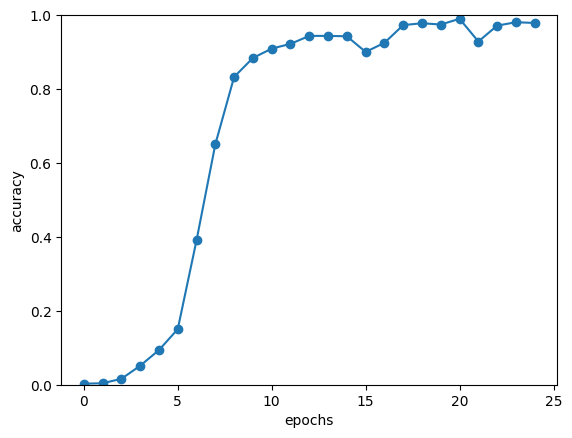

In [40]:
# coding: utf-8
import sys
sys.path.append(r'C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-2-master')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# データセットの読み込み
(x_train, t_train) , (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# Reverse input? =================================================
is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# Normal or Peeky? ==============================================
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
# 1エポック毎に10このテストデータを使って正解率を出力
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()



| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 0[s] | loss 2.53
| epoch 1 |  iter 41 / 351 | time 0[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 1[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 1[s] | loss 1.92
| epoch 1 |  iter 101 / 351 | time 2[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 2[s] | loss 1.85
| epoch 1 |  iter 141 / 351 | time 2[s] | loss 1.83
| epoch 1 |  iter 161 / 351 | time 3[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 3[s] | loss 1.77
| epoch 1 |  iter 201 / 351 | time 4[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 4[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 4[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 5[s] | loss 1.76
| epoch 1 |  iter 281 / 351 | time 5[s] | loss 1.75
| epoch 1 |  iter 301 / 351 | time 6[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 6[s] | loss 1.75
| epoch 1 |  iter 341 / 351 | time 7[s] | loss 1.74
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 66

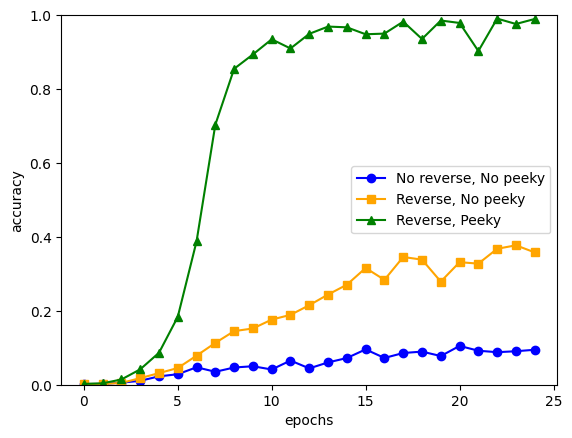

In [41]:
import sys
sys.path.append(r'C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-2-master')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq

# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

def train_and_evaluate(is_reverse, use_peeky):
    if is_reverse:
        x_train_rev, x_test_rev = x_train[:, ::-1], x_test[:, ::-1]
    else:
        x_train_rev, x_test_rev = x_train, x_test

    if use_peeky:
        model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
    else:
        model = Seq2seq(vocab_size, wordvec_size, hidden_size)

    optimizer = Adam()
    trainer = Trainer(model, optimizer)

    acc_list = []
    for epoch in range(max_epoch):
        trainer.fit(x_train_rev, t_train, max_epoch=1,
                    batch_size=batch_size, max_grad=max_grad)

        correct_num = 0
        for i in range(len(x_test)):
            question, correct = x_test_rev[[i]], t_test[[i]]
            verbose = i < 10
            correct_num += eval_seq2seq(model, question, correct,
                                        id_to_char, verbose, is_reverse)

        acc = float(correct_num) / len(x_test)
        acc_list.append(acc)
        print('val acc %.3f%%' % (acc * 100))

    return acc_list

# 学習と評価の実行
acc_list_no_rev_no_peeky = train_and_evaluate(is_reverse=False, use_peeky=False)
acc_list_rev_no_peeky = train_and_evaluate(is_reverse=True, use_peeky=False)
acc_list_rev_peeky = train_and_evaluate(is_reverse=True, use_peeky=True)

# グラフの描画
x = np.arange(max_epoch)
plt.plot(x, acc_list_no_rev_no_peeky, marker='o', color='blue', label='No reverse, No peeky')
plt.plot(x, acc_list_rev_no_peeky, marker='s', color='orange', label='Reverse, No peeky')
plt.plot(x, acc_list_rev_peeky, marker='^', color='green', label='Reverse, Peeky')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend()
plt.show()
